# <u>EDA</u>

#### Imports

In [1]:
import pandas as pd
import numpy as np
import ast

import matplotlib as mpl
import matplotlib.pyplot as plt      
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers
#Remove the following line for interactive graphs
pio.renderers.default = "png"
from wordcloud import WordCloud
%matplotlib inline

In [2]:
df = pd.read_csv("RecipeDataCleaned.csv")
# Dropping additional index column
df = df.drop(df.columns[0], axis = 1)
df["Ingredients"] = df["Ingredients"].apply(ast.literal_eval)

In [3]:
df.head()

,Recipe,Rating,Number of Raters,Time,Categories,Servings,Ingredients,Instructions,Calories,Fat,Carbs,Proteins,Year,Month
0,Air Fryer Waffle Egg in a Hole,5.0,1.0,10.0,Breakfast,1.0,"[pepper, cheese, salt, egg, waffle, syrup]",142,444.0,24.0,39.0,18.0,2023,4
1,Air Fryer Chicken Bites with Parmesan Cheese,5.0,3.0,28.0,Appetizer,4.0,"[parsley, worcestershire, pepper, salt, season...",103,187.0,5.0,4.0,29.0,2022,9
2,Air Fryer Cherry Cream Cheese Croissants,4.6,5.0,15.0,Breakfast,8.0,"[cheese, dough, cinnamon, cherry, roll, cream,...",149,227.0,16.0,16.0,5.0,2022,8
3,Air Fryer Smoked Salmon Wontons,5.0,2.0,50.0,Appetizer,48.0,"[salmon, wonton, cheese, onion, water, caper, ...",206,38.0,1.0,5.0,1.0,2022,11
4,Air-Fried Raspberry Brie Bites,4.0,1.0,35.0,Appetizer,16.0,"[cheese, raspberry, phyllo, dough, honey, salt...",167,252.0,16.0,23.0,4.0,2022,10


<u>Basic Stats:</u>

In [4]:
df.describe()

,Rating,Number of Raters,Time,Servings,Instructions,Calories,Fat,Carbs,Proteins,Year,Month
count,10518.000000,10518.000000,10518.000000,10518.000000,10518.000000,10518.000000,10518.000000,10518.000000,10518.000000,10518.000000,10518.000000
mean,4.490806,273.231698,124.767351,10.812607,118.532706,342.845883,17.611808,32.716201,14.124073,2014.203556,5.719148
std,0.394688,867.200302,594.106843,11.258980,66.536253,210.420632,14.488634,24.850133,13.852615,8.448870,2.682253
min,1.000000,1.000000,0.000000,1.000000,8.000000,5.000000,0.000000,0.000000,0.000000,1997.000000,1.000000
25%,4.300000,10.000000,30.000000,5.000000,73.000000,190.000000,8.000000,14.000000,4.000000,2010.000000,4.000000
50%,4.600000,48.000000,55.000000,8.000000,105.000000,313.000000,15.000000,29.000000,9.000000,2019.000000,6.000000
75%,4.700000,197.000000,100.000000,12.000000,149.000000,451.000000,24.000000,46.000000,22.000000,2020.000000,7.000000
max,5.000000,20044.000000,34720.000000,272.000000,654.000000,3565.000000,228.000000,531.000000,137.000000,2023.000000,12.000000


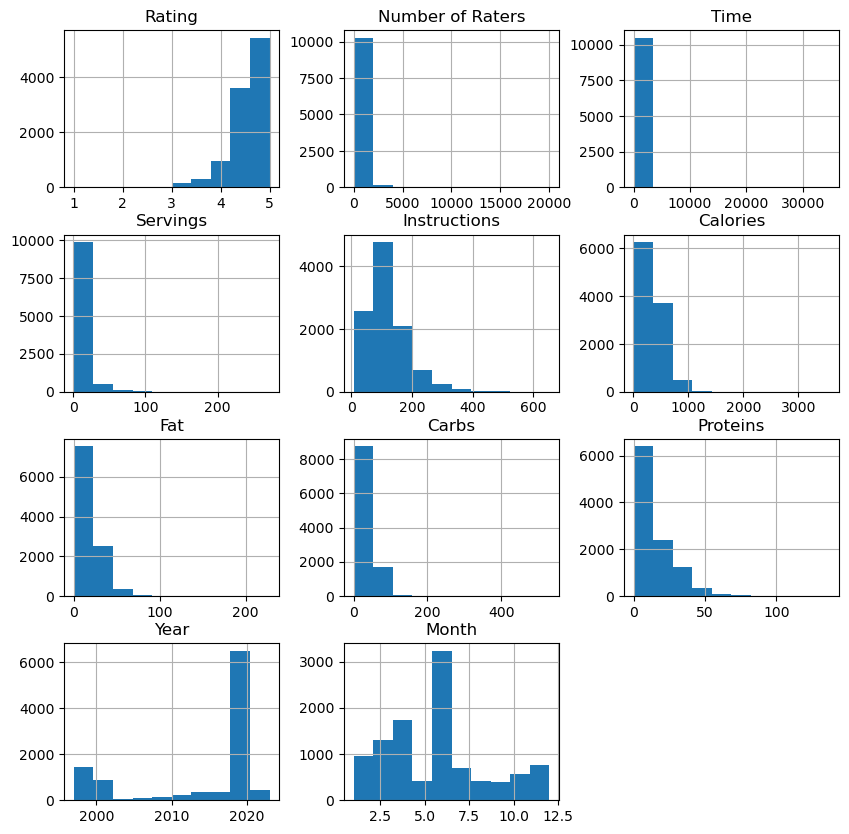

In [5]:
df.hist(figsize=(10,10));

<u>Visualize Outliers:</u></br>
Box plotting numerical columns to catch outliers.


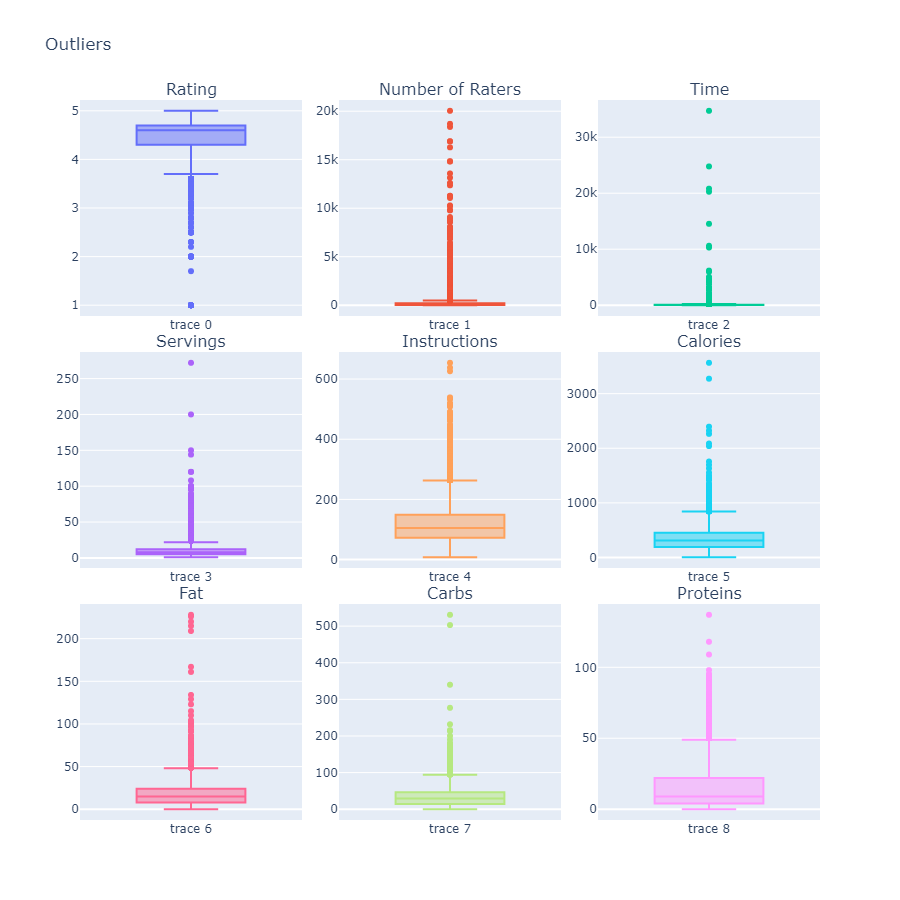

In [6]:
subplots = ["Rating", "Number of Raters", "Time", "Servings", "Instructions", "Calories", "Fat", "Carbs", "Proteins"]
fig = make_subplots(rows=3, cols=3, subplot_titles = subplots, horizontal_spacing= 0.05, vertical_spacing = 0.05)
for i in range(3):
    for j in range(3):
        col = subplots[j+(i*3)]
        fig.add_trace(go.Box(y=df[col]), row= 1+i, col= 1+j)

fig.update_layout(height = 900, width = 900, title_text = "Outliers", showlegend = False)
fig.show();

<u>Adding numbers to the box plots</u>:

Function receives column name, and returns dictionary containing: q1, q3, iqr, number of outliers and upper/lower whisker info (q1-1.5σ, q3+1.5σ).

In [7]:
def column_outliers_info(col):
    q1=np.percentile(df[col], 25)
    q3=np.percentile(df[col], 75)
    iqr = q3-q1
    number_outliers = len(df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)])
    lower = q1 - 1.5*iqr
    if lower < 0:
        lower = 0
    upper = q3 + 1.5*iqr
    return {"Column":col, "Q1":q1, "Q3":q3, "IQR":iqr, "Number of Outliers":number_outliers,\
            "Lower Whisker":lower, "Upper Whisker":upper}

In [8]:
#Choosing numeric columns to show stats, also removing Month and Year columns as they aren't important.
numeric_columns = list(df.drop(["Recipe","Categories","Ingredients","Month","Year"], axis=1))
outliers_df = []
for column in numeric_columns:
    outliers_df.append(column_outliers_info(column))
stats_df=pd.DataFrame(outliers_df)
stats_df

,Column,Q1,Q3,IQR,Number of Outliers,Lower Whisker,Upper Whisker
0,Rating,4.3,4.7,0.4,311,3.7,5.3
1,Number of Raters,10.0,197.0,187.0,1342,0.0,477.5
2,Time,30.0,100.0,70.0,1175,0.0,205.0
3,Servings,5.0,12.0,7.0,1127,0.0,22.5
4,Instructions,73.0,149.0,76.0,384,0.0,263.0
5,Calories,190.0,451.0,261.0,234,0.0,842.5
6,Fat,8.0,24.0,16.0,337,0.0,48.0
7,Carbs,14.0,46.0,32.0,188,0.0,94.0
8,Proteins,4.0,22.0,18.0,224,0.0,49.0


Most of the columns in our dataset have a right-skewed distribution with extreme outliers. To address this, a useful scaling and normalization method is log transformation. By applying log transformation to the data, we can reduce the impact of extreme outliers and achieve a more symmetrical distribution.

In [9]:
col_to_norm = ["Number of Raters", "Time", "Servings", "Instructions", "Calories", "Fat", "Carbs", "Proteins"]
for col in col_to_norm:
    df[col] = df[col].apply(lambda x: np.log(x))

In [10]:
df.head()

,Recipe,Rating,Number of Raters,Time,Categories,Servings,Ingredients,Instructions,Calories,Fat,Carbs,Proteins,Year,Month
0,Air Fryer Waffle Egg in a Hole,5.0,0.000000,2.302585,Breakfast,0.000000,"[pepper, cheese, salt, egg, waffle, syrup]",4.955827,6.095825,3.178054,3.663562,2.890372,2023,4
1,Air Fryer Chicken Bites with Parmesan Cheese,5.0,1.098612,3.332205,Appetizer,1.386294,"[parsley, worcestershire, pepper, salt, season...",4.634729,5.231109,1.609438,1.386294,3.367296,2022,9
2,Air Fryer Cherry Cream Cheese Croissants,4.6,1.609438,2.708050,Breakfast,2.079442,"[cheese, dough, cinnamon, cherry, roll, cream,...",5.003946,5.424950,2.772589,2.772589,1.609438,2022,8
3,Air Fryer Smoked Salmon Wontons,5.0,0.693147,3.912023,Appetizer,3.871201,"[salmon, wonton, cheese, onion, water, caper, ...",5.327876,3.637586,0.000000,1.609438,0.000000,2022,11
4,Air-Fried Raspberry Brie Bites,4.0,0.000000,3.555348,Appetizer,2.772589,"[cheese, raspberry, phyllo, dough, honey, salt...",5.117994,5.529429,2.772589,3.135494,1.386294,2022,10


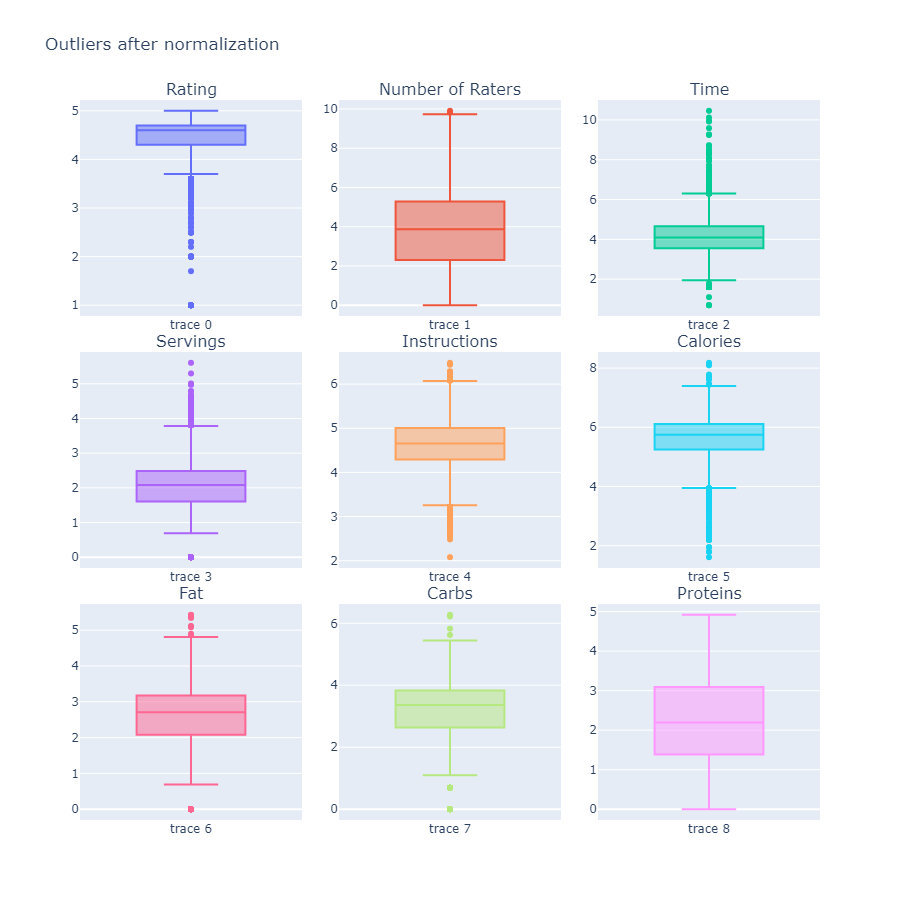

In [11]:
subplots = ["Rating", "Number of Raters", "Time", "Servings", "Instructions", "Calories", "Fat", "Carbs", "Proteins"]
fig = make_subplots(rows=3, cols=3, subplot_titles = subplots, horizontal_spacing= 0.05, vertical_spacing = 0.05)
for i in range(3):
    for j in range(3):
        col = subplots[j+(i*3)]
        fig.add_trace(go.Box(y=df[col]), row= 1+i, col= 1+j)

fig.update_layout(height = 900, width = 900, title_text = "Outliers after normalization", showlegend = False)
fig.show();

In [12]:
#Choosing numeric columns to show stats, also removing Month and Year columns as they aren't important.
numeric_columns = list(df.drop(["Recipe","Categories","Ingredients","Month","Year"], axis=1))
outliers_df = []
for column in numeric_columns:
    outliers_df.append(column_outliers_info(column))
stats_df=pd.DataFrame(outliers_df)
stats_df

,Column,Q1,Q3,IQR,Number of Outliers,Lower Whisker,Upper Whisker
0,Rating,4.300000,4.700000,0.400000,311,3.700000,5.300000
1,Number of Raters,2.302585,5.283204,2.980619,3,0.000000,9.754132
2,Time,3.401197,4.605170,1.203973,591,1.595238,6.411129
3,Servings,1.609438,2.484907,0.875469,447,0.296235,3.798110
4,Instructions,4.290459,5.003946,0.713487,236,3.220229,6.074177
5,Calories,5.247024,6.111467,0.864443,222,3.950359,7.408132
6,Fat,2.079442,3.178054,1.098612,523,0.431523,4.825972
7,Carbs,2.639057,3.828641,1.189584,477,0.854681,5.613017
8,Proteins,1.386294,3.091042,1.704748,165,0.000000,5.648165


After applying the log transformation, we check for correlations between the normalized features. 

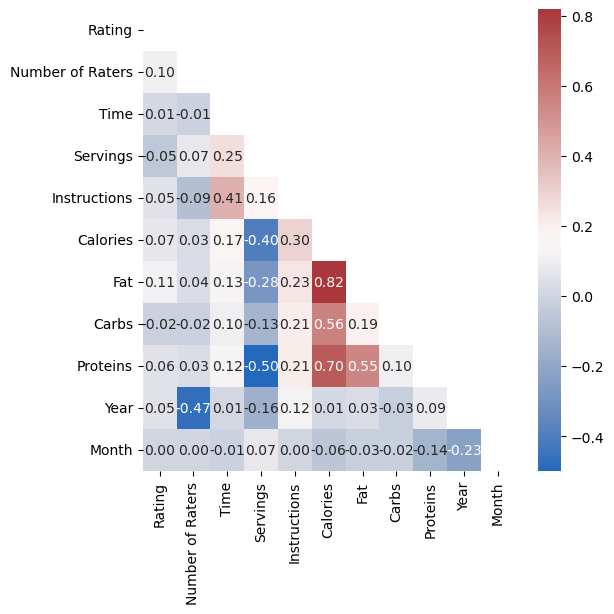

In [13]:
fig = plt.figure(figsize=(6,6))
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, fmt=".2f",cmap='vlag', mask=np.triu(corr_mat));

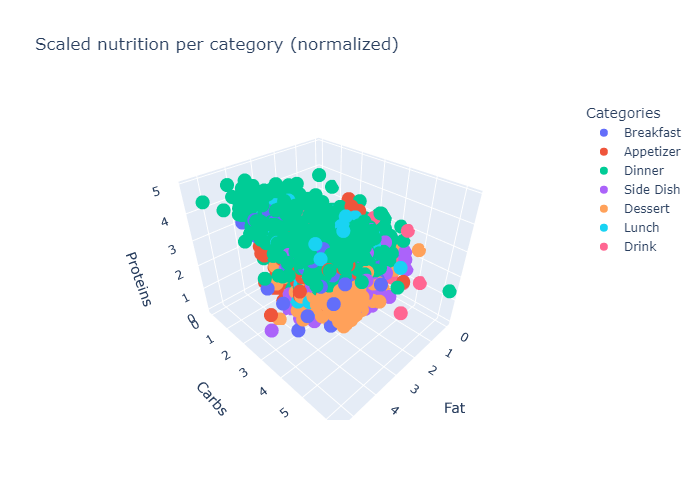

In [14]:
fig = px.scatter_3d(df, x="Fat", y="Carbs", z="Proteins", color = "Categories",
                    title = "Scaled nutrition per category (normalized)",
                   hover_name="Recipe")
fig.show();

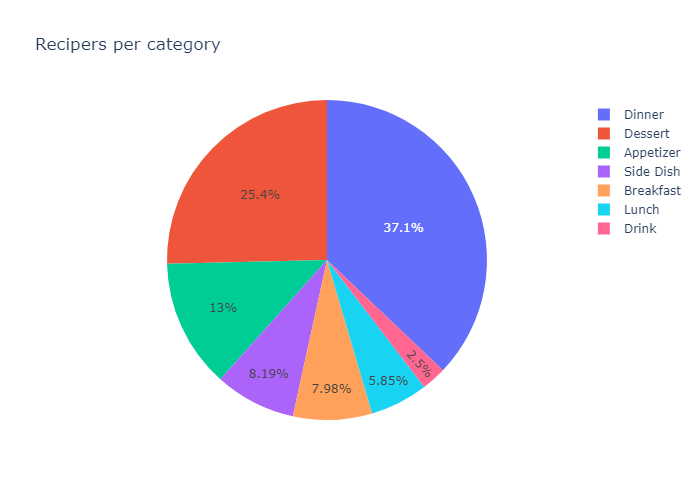

In [15]:
categories = df["Categories"].value_counts()
categories_df = pd.DataFrame({"Category": categories.index, "Number of recipes": categories.values})
fig = px.pie(categories_df, values = "Number of recipes", names = "Category", title='Recipers per category')
fig.show();

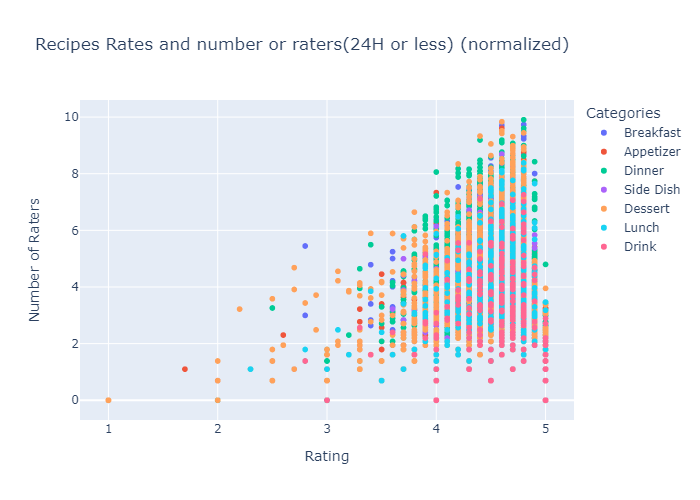

In [16]:
fig = px.scatter(df, x="Rating", y="Number of Raters", color="Categories",
                 title ="Recipes Rates and number or raters(24H or less) (normalized)",
                 hover_name="Recipe")
fig.show();

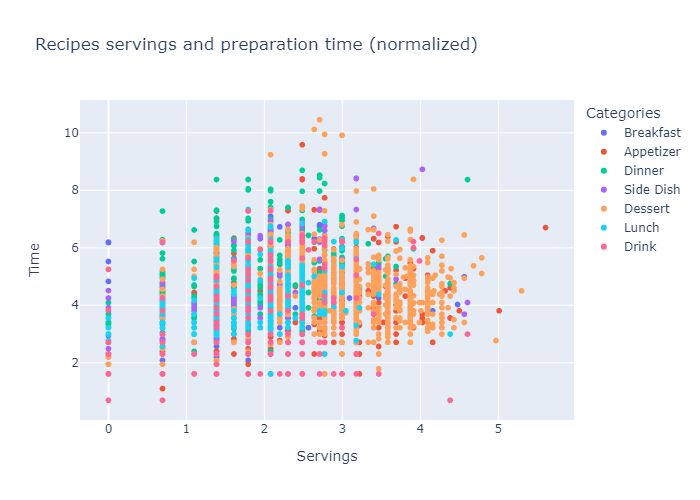

In [17]:
fig = px.scatter(df, x="Servings", y="Time", color= "Categories",
                 title ="Recipes servings and preparation time (normalized)",
                 hover_name="Recipe")
fig.show();

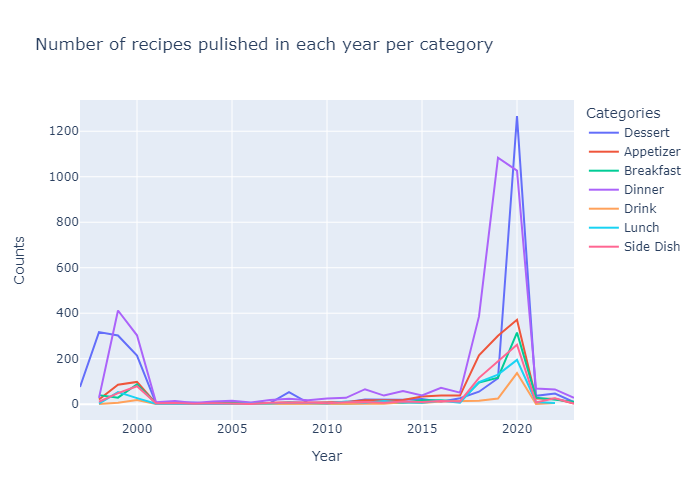

In [18]:
counts = df.groupby(['Year', 'Categories']).size().reset_index(name='Counts')
fig = px.line(counts, x="Year", y="Counts", color='Categories',
              title = "Number of recipes pulished in each year per category")
fig.show()

Once again, we observe that the majority of recipes in our dataset fall under the categories of Dinners and Desserts. It is interesting to note the pattern of recipe uploads over time on allrecipes.com.</br>
During the early years, from 1997 to 2000, there was a notable flow of recipe uploads,particularly Desserts and Dinners.</br> However, from 2001 to 2017, there was a significant decrease in the number of recipes being added.</br> The years from 2018 to 2020 witnessed a substantial growth in recipe uploads, with hundreds and even thousand recipes being added for each category.
However, starting from 2021 to 2023, there was a sudden decline in recipe uploads, resembling the era prior to 2018.</br>
It is worth mentioning that a considerable number of recipes were added during the COVID-19 pandemic, particularly with a focus on desserts and dinners.

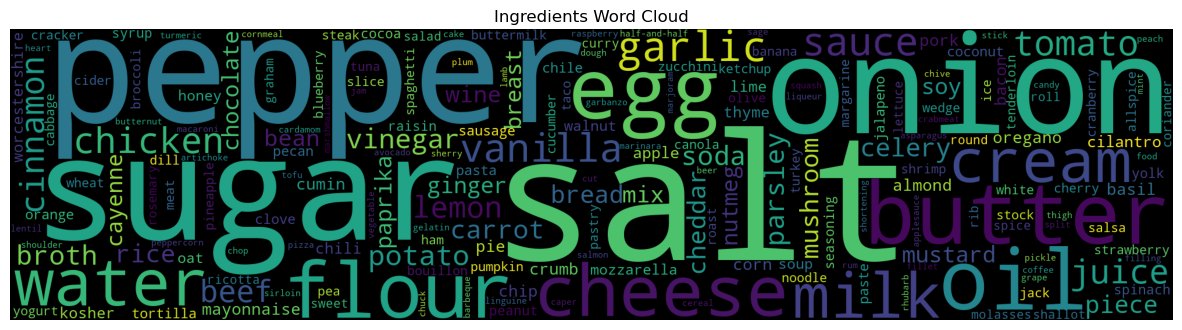

In [19]:
all_ingredients = {}
for ingredients in df["Ingredients"]:
    for ing in ingredients:
        if ing in all_ingredients:
            all_ingredients[ing] +=1
        else:
            all_ingredients[ing] =1
wc = WordCloud(width =2000, height = 500).generate_from_frequencies(all_ingredients)
plt.figure(figsize=(15, 7))
plt.imshow(wc)
plt.title("Ingredients Word Cloud")
plt.axis("off")
plt.show()


In [20]:
df.to_csv('RecipeDataEDAed.csv')